<a href="https://colab.research.google.com/github/MitashaJ/Fruit-detection-and-classification-/blob/main/Copy_of_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os


#**Fruit Quality Detection**

In [ ]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

**Apple**

In [ ]:
train_datset=train.flow_from_directory('/content/drive/MyDrive/ML_dataset/Apples/Train',target_size=(200,200),batch_size=20,
                                       class_mode='binary')

test_datset=test.flow_from_directory('/content/drive/MyDrive/ML_dataset/Apples/Validation',target_size=(200,200),batch_size=20,
                                       class_mode='binary')

# feactures extraction,operating sequential model
app_model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  # relu=non-linear activation function


                                  tf.keras.layers.Flatten(),
                                  # flatten to convert into 1-D
                                  tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')


                                  ])
app_model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])
# loss=cost function
model_fit=app_model.fit(train_datset,steps_per_epoch=7,epochs=20,validation_data=test_datset)

test_datset.class_indices

# determining class like fresh:0 -  rotten -1





Found 4035 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Epoch 1/20
7/7 [==============================] - 24s 3s/step - loss: 0.7685 - accuracy: 0.6286 - val_loss: 0.7887 - val_accuracy: 0.4800
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 0.6848 - accuracy: 0.6357 - val_loss: 0.6944 - val_accuracy: 0.4800
Epoch 3/20
7/7 [==============================] - 16s 2s/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6945 - val_accuracy: 0.4800
Epoch 4/20
7/7 [==============================] - 16s 2s/step - loss: 0.7063 - accuracy: 0.6643 - val_loss: 0.6938 - val_accuracy: 0.4800
Epoch 5/20
7/7 [==============================] - 14s 2s/step - loss: 0.6532 - accuracy: 0.6357 - val_loss: 0.7184 - val_accuracy: 0.4800
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.6202 - accuracy: 0.6929 - val_loss: 0.6826 - val_accuracy: 0.6100
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.6430 - accuracy: 0.6000 - val_loss: 0.7982 - val_accuracy: 0.4600
Epoch 8/20
7/7 [==================

{'fresh_apples': 0, 'rotten_apples': 1}

In [ ]:
app_model.save('apple.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/models/apple.h5')


 ---------------------Image No.  1 --------------------


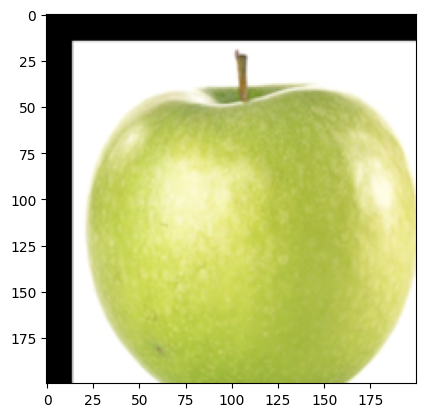

1/1 [==============================] - 0s 76ms/step
Enter expected input : fresh

 ---------------------Image No.  2 --------------------


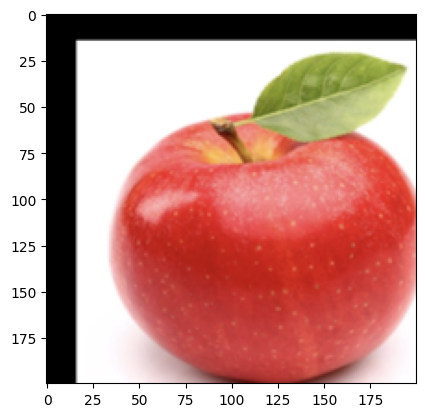

1/1 [==============================] - 0s 38ms/step
Enter expected input : fresh

 ---------------------Image No.  3 --------------------


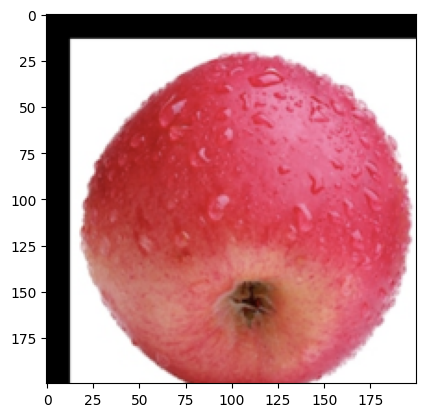

1/1 [==============================] - 0s 59ms/step
Enter expected input : fresh

 ---------------------Image No.  4 --------------------


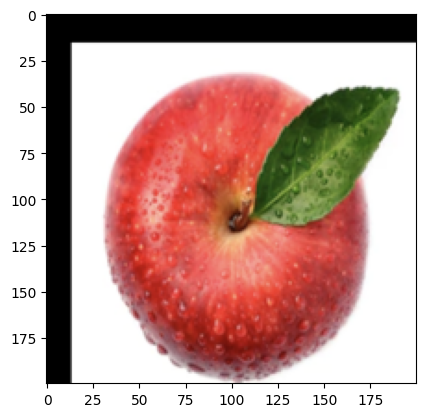

1/1 [==============================] - 0s 49ms/step
Enter expected input : fresh

 ---------------------Image No.  5 --------------------


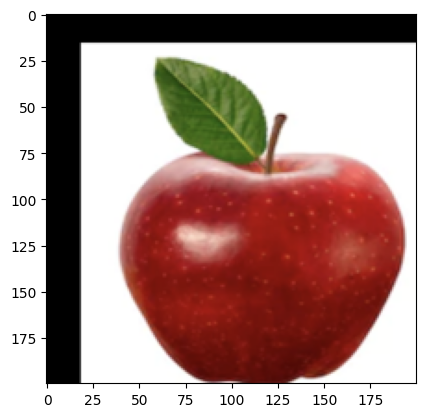

1/1 [==============================] - 0s 37ms/step
Enter expected input : fresh

 ---------------------Image No.  6 --------------------


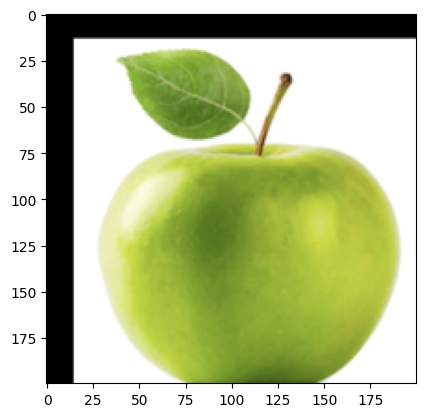

1/1 [==============================] - 0s 43ms/step
Enter expected input : fresh

 ---------------------Image No.  7 --------------------


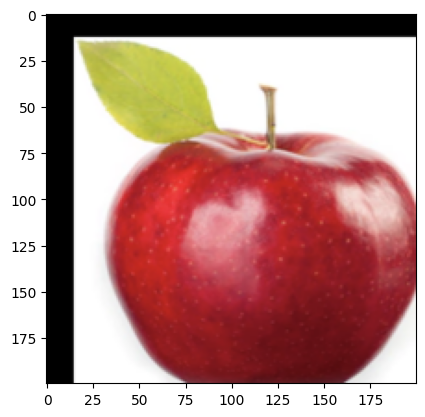

1/1 [==============================] - 0s 35ms/step
Enter expected input : fresh

 ---------------------Image No.  8 --------------------


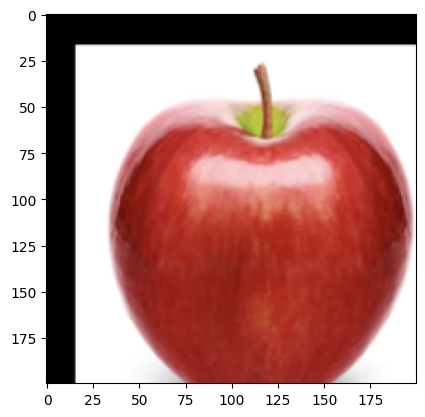

1/1 [==============================] - 0s 36ms/step
Enter expected input : fresh

 ---------------------Image No.  9 --------------------


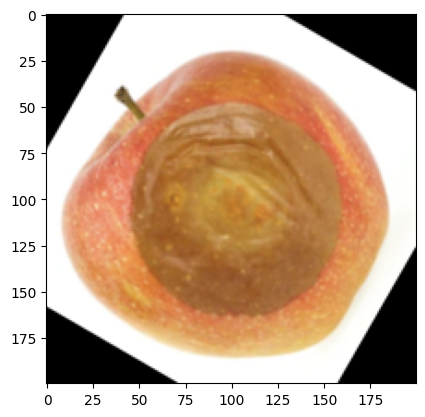

1/1 [==============================] - 0s 79ms/step
Enter expected input : rotten

 ---------------------Image No.  10 --------------------


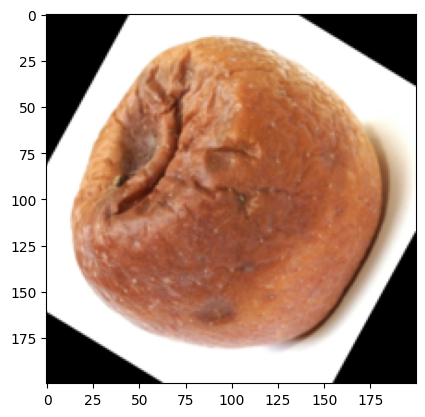

1/1 [==============================] - 0s 38ms/step
Enter expected input : rotten

 ---------------------Image No.  11 --------------------


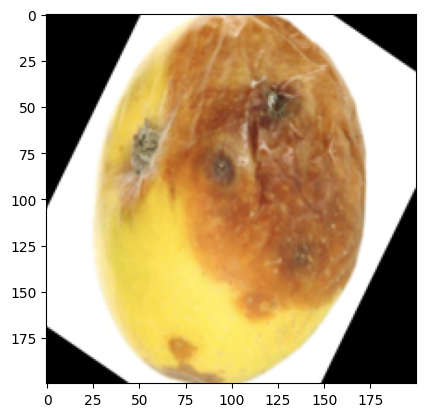

1/1 [==============================] - 0s 65ms/step
Enter expected input : rotten

 ---------------------Image No.  12 --------------------


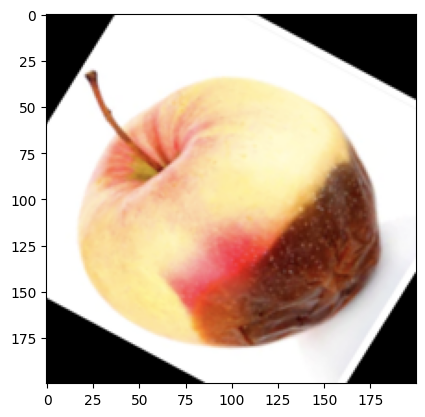

1/1 [==============================] - 0s 39ms/step
Enter expected input : rotten

 ---------------------Image No.  13 --------------------


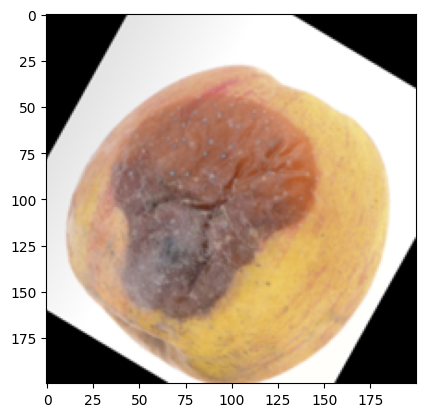

1/1 [==============================] - 0s 42ms/step
Enter expected input : rotten

 ---------------------Image No.  14 --------------------


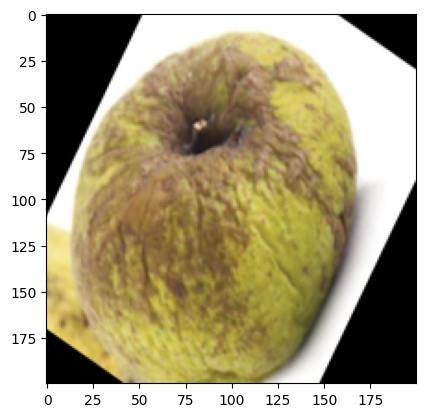

1/1 [==============================] - 0s 40ms/step
Enter expected input : rotten

 ---------------------Image No.  15 --------------------


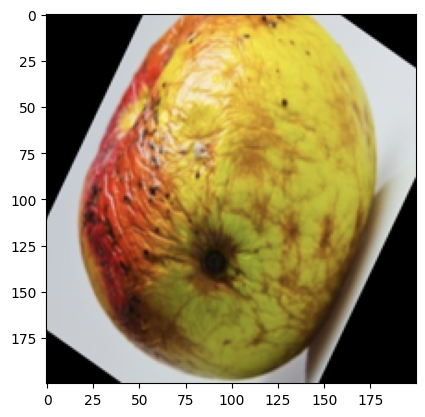

1/1 [==============================] - 0s 92ms/step
Enter expected input : rotten

 ---------------------Image No.  16 --------------------


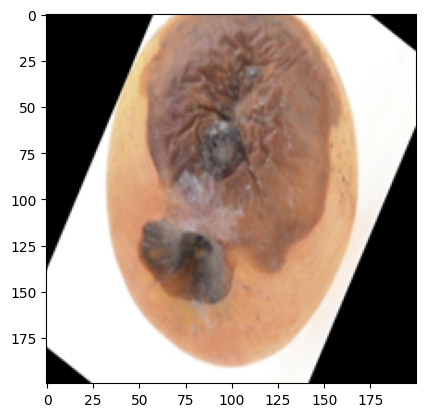

1/1 [==============================] - 0s 168ms/step
Enter expected input : rotten
|   Image | Expected   | Prediction   |
|--------:|:-----------|:-------------|
|       1 | fresh      | Fresh        |
|       2 | fresh      | Fresh        |
|       3 | fresh      | Fresh        |
|       4 | fresh      | Fresh        |
|       5 | fresh      | Fresh        |
|       6 | fresh      | Fresh        |
|       7 | fresh      | Fresh        |
|       8 | fresh      | Fresh        |
|       9 | rotten     | Rotten       |
|      10 | rotten     | Rotten       |
|      11 | rotten     | Rotten       |
|      12 | rotten     | Fresh        |
|      13 | rotten     | Rotten       |
|      14 | rotten     | Rotten       |
|      15 | rotten     | Fresh        |
|      16 | rotten     | Rotten       |
87.5


In [ ]:
import os
import numpy as np
from PIL import Image
from tabulate import tabulate

dir_path = '/content/drive/MyDrive/ML_dataset/Apples/Test'
results = []
count=1
l1=[]
expected=[]

for i in os.listdir(dir_path):
    print("\n ---------------------Image No. ",count,"--------------------")
    img_path = os.path.join(dir_path, i)
    img = Image.open(img_path).resize((200, 200))
    X = np.array(img)
    plt.imshow(img)
    plt.show()
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = loaded_model.predict(images)[0][0]
    if val == 0:
        l1.append(0)
        prediction = "Fresh"
    else:
        l1.append(1)
        prediction = "Rotten"
    exp=input("Enter expected input : ")
    if(exp=="fresh" or exp=="Fresh"):
      expected.append(0)
    elif (exp=="rotten" or exp=="Rotten"):
      expected.append(1)
    else:
      break

    results.append([count,exp,prediction])
    count=count+1

print(tabulate(results, headers=["Image", "Expected","Prediction"], tablefmt="pipe"))
acc=0
for i in range(len(expected)):
  if expected[i]==l1[i] :
    acc=acc+1

accuracy=float(acc/len(expected))*100
print(accuracy)

**BANANA**

In [ ]:
train_datset=train.flow_from_directory('/content/drive/MyDrive/data/bananas/train',target_size=(200,200),batch_size=20,
                                       class_mode='binary')
test_datset=test.flow_from_directory('/content/drive/MyDrive/data/bananas/test',target_size=(200,200),batch_size=20,
                                       class_mode='binary')
# feactures extraction,operating sequential model
ban_model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  # relu=non-linear activation function


                                  tf.keras.layers.Flatten(),
                                  # flatten to convert into 1-D

                                  tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')


                                  ])
ban_model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

model_fit=ban_model.fit(train_datset,steps_per_epoch=7,epochs=20,validation_data=test_datset)

test_datset.class_indices
# determining class like fresh:0 -  rotten -1


Found 228 images belonging to 2 classes.
Found 186 images belonging to 2 classes.


Epoch 1/20
7/7 [==============================] - 96s 1s/step - loss: 1.0741 - accuracy: 0.5312 - val_loss: 0.8627 - val_accuracy: 0.3602
Epoch 2/20
7/7 [==============================] - 8s 1s/step - loss: 0.6779 - accuracy: 0.6250 - val_loss: 0.7840 - val_accuracy: 0.3602
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.6123 - accuracy: 0.6719 - val_loss: 0.4969 - val_accuracy: 0.9086
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 0.5901 - accuracy: 0.8214 - val_loss: 0.8239 - val_accuracy: 0.3710
Epoch 5/20
7/7 [==============================] - 8s 1s/step - loss: 0.4958 - accuracy: 0.7143 - val_loss: 0.4389 - val_accuracy: 0.9731
Epoch 6/20
7/7 [==============================] - 7s 986ms/step - loss: 0.7248 - accuracy: 0.7812 - val_loss: 1.0239 - val_accuracy: 0.3710
Epoch 7/20
7/7 [==============================] - 6s 929ms/step - loss: 0.4799 - accuracy: 0.7344 - val_loss: 0.5829 - val_accuracy: 0.6505
Epoch 8/20
7/7 [==================

{'fresh': 0, 'rotten': 1}

In [ ]:
ban_model.save('banana.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/models/banana.h5')


 ---------------------Image No.  1 --------------------


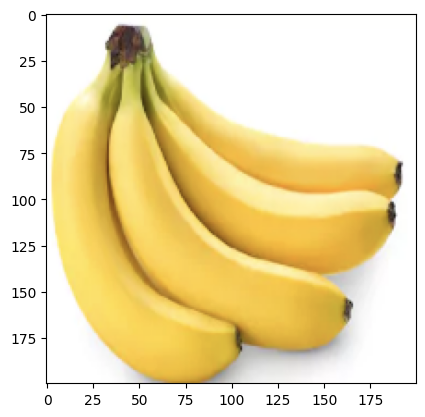

1/1 [==============================] - 0s 149ms/step
Enter expected input : fresh

 ---------------------Image No.  2 --------------------


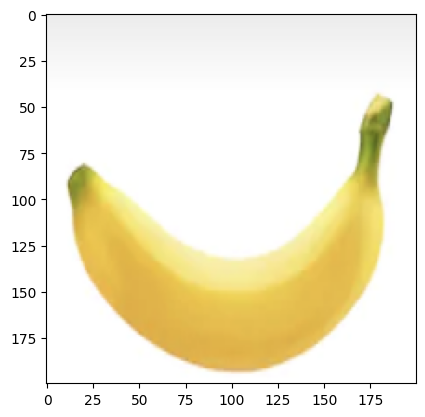

1/1 [==============================] - 0s 70ms/step
Enter expected input : fresh

 ---------------------Image No.  3 --------------------


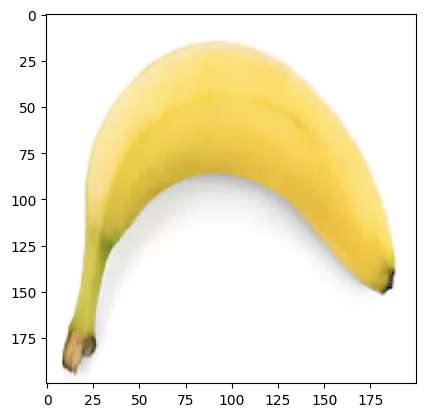

1/1 [==============================] - 0s 37ms/step
Enter expected input : fresh

 ---------------------Image No.  4 --------------------


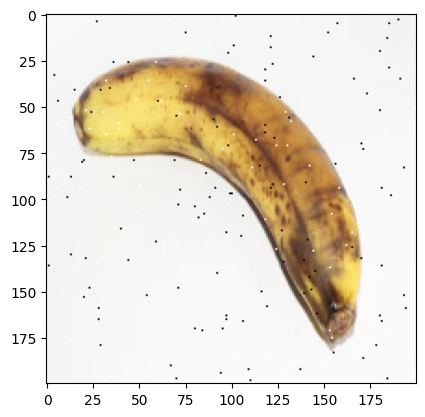

1/1 [==============================] - 0s 40ms/step
Enter expected input : rotten

 ---------------------Image No.  5 --------------------


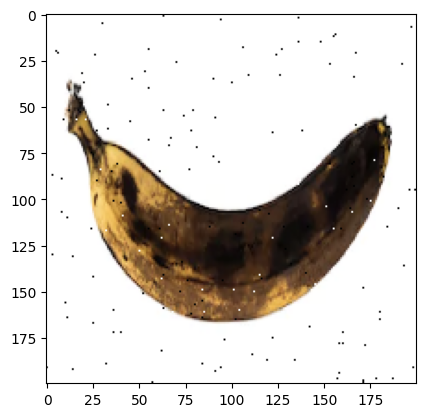

1/1 [==============================] - 0s 38ms/step
Enter expected input : rotten

 ---------------------Image No.  6 --------------------


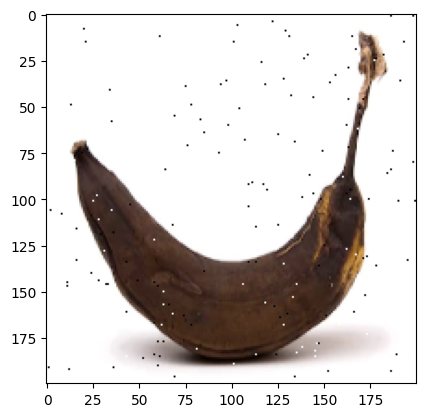

1/1 [==============================] - 0s 40ms/step
Enter expected input : rotten
|   Image | Expected   | Prediction   |
|--------:|:-----------|:-------------|
|       1 | fresh      | Fresh        |
|       2 | fresh      | Fresh        |
|       3 | fresh      | Fresh        |
|       4 | rotten     | Fresh        |
|       5 | rotten     | Rotten       |
|       6 | rotten     | Rotten       |
Accuracy 83.33333333333334


In [ ]:
from tensorflow.keras.models import load_model
# load model
loaded_model = load_model('/content/drive/MyDrive/models/banana.h5')
count=1
results = []

l1=[]
expected=[]
dir_path='/content/drive/MyDrive/ML_dataset/Bananas/Test'
# load test data
for i in os.listdir(dir_path):
  print("\n ---------------------Image No. ",count,"--------------------")

  img=image.load_img(dir_path+'//'+i,target_size=(200,200))
  plt.imshow(img)
  plt.show()
  # print image
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  # expand is to match result dimension with model dimensions
  images=np.vstack([X])
  # arrange in vertical stack
  val=loaded_model.predict(images)
  if val == 0:
        l1.append(0)
        prediction = "Fresh"
  else:
        l1.append(1)
        prediction = "Rotten"
  exp=input("Enter expected input : ")
  if(exp=="fresh" or exp=="Fresh"):
      expected.append(0)
  elif (exp=="rotten" or exp=="Rotten"):
      expected.append(1)
  else:
      break
  results.append([count,exp,prediction])

  count=count+1
print(tabulate(results, headers=["Image", "Expected","Prediction"], tablefmt="pipe"))

acc=0
for i in range(len(expected)):
  if expected[i]==l1[i] :
    acc=acc+1
# calculating accuraccy
accuracy=float(acc/len(expected))*100
print("Accuracy",accuracy)


**Orange**

In [ ]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_datset=train.flow_from_directory('/content/drive/MyDrive/ML_dataset/Oranges/Train',target_size=(200,200),batch_size=20,
                                       class_mode='binary')
test_datset=test.flow_from_directory('/content/drive/MyDrive/ML_dataset/Oranges/Validation',target_size=(200,200),batch_size=20,
                                       class_mode='binary')
# feactures extraction,operating sequential model

ora_model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                 #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),

                                   tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  # relu=non-linear activation function

                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')


                                  ])
ora_model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

model_fit=ora_model.fit(train_datset,steps_per_epoch=7,epochs=20,validation_data=test_datset)

test_datset.class_indices

Found 3061 images belonging to 2 classes.
Found 3061 images belonging to 2 classes.


Epoch 1/20
7/7 [==============================] - 952s 158s/step - loss: 1.8908 - accuracy: 0.4857 - val_loss: 0.6733 - val_accuracy: 0.5211
Epoch 2/20
7/7 [==============================] - 66s 11s/step - loss: 0.7022 - accuracy: 0.5207 - val_loss: 0.6761 - val_accuracy: 0.5384
Epoch 3/20
7/7 [==============================] - 69s 11s/step - loss: 0.6949 - accuracy: 0.6500 - val_loss: 0.6279 - val_accuracy: 0.5289
Epoch 4/20
7/7 [==============================] - 100s 16s/step - loss: 0.6083 - accuracy: 0.6929 - val_loss: 0.5434 - val_accuracy: 0.8451
Epoch 5/20
7/7 [==============================] - 66s 11s/step - loss: 0.5680 - accuracy: 0.7214 - val_loss: 0.4316 - val_accuracy: 0.8295
Epoch 6/20
7/7 [==============================] - 97s 16s/step - loss: 0.5590 - accuracy: 0.7071 - val_loss: 0.4194 - val_accuracy: 0.8373
Epoch 7/20
7/7 [==============================] - 66s 11s/step - loss: 0.4509 - accuracy: 0.7929 - val_loss: 0.6208 - val_accuracy: 0.5812
Epoch 8/20
7/7 [========

{'fresh_oranges': 0, 'rotten_oranges': 1}

In [ ]:
ora_model.save('orange.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/models/orange.h5')


 ---------------------Image No.  1 --------------------


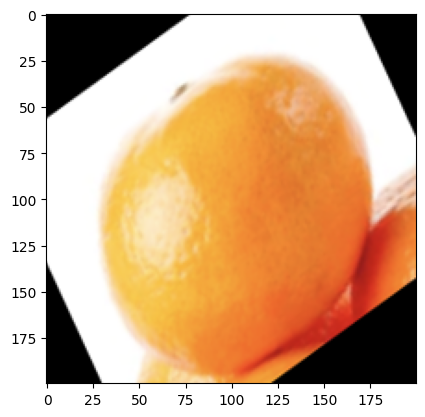

1/1 [==============================] - 0s 94ms/step
Enter expected input : fresh

 ---------------------Image No.  2 --------------------


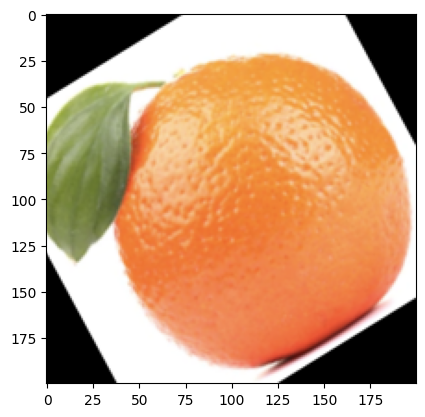

1/1 [==============================] - 0s 55ms/step
Enter expected input : fresh

 ---------------------Image No.  3 --------------------


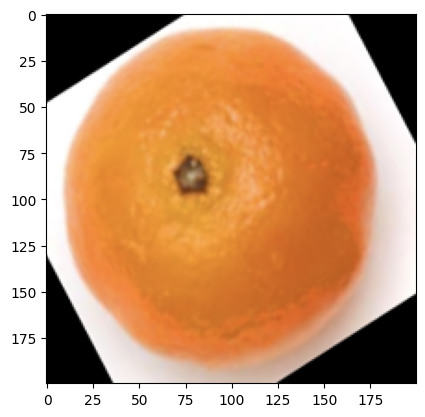

1/1 [==============================] - 0s 29ms/step
Enter expected input : fresh

 ---------------------Image No.  4 --------------------


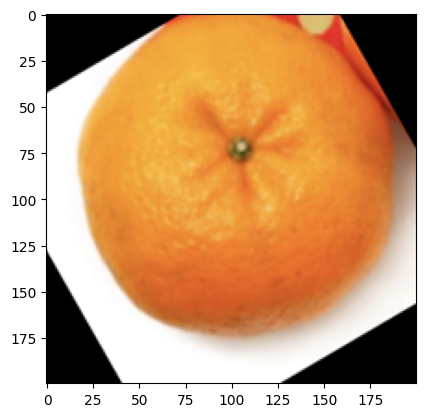

1/1 [==============================] - 0s 27ms/step
Enter expected input : fresh

 ---------------------Image No.  5 --------------------


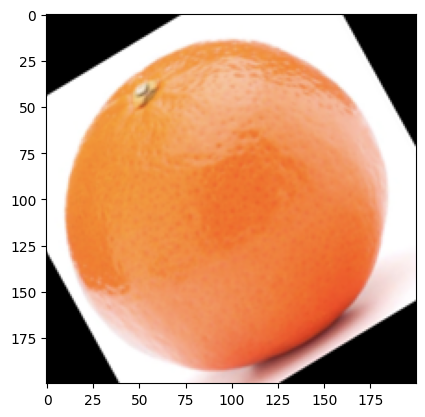

1/1 [==============================] - 0s 36ms/step
Enter expected input : fresh

 ---------------------Image No.  6 --------------------


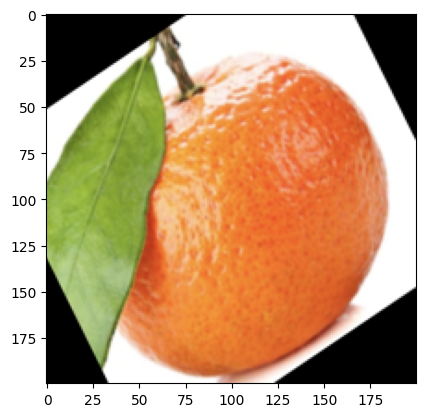

1/1 [==============================] - 0s 42ms/step
Enter expected input : fresh

 ---------------------Image No.  7 --------------------


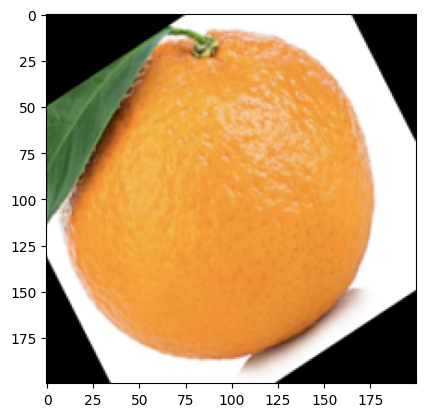

1/1 [==============================] - 0s 42ms/step
Enter expected input : fresh

 ---------------------Image No.  8 --------------------


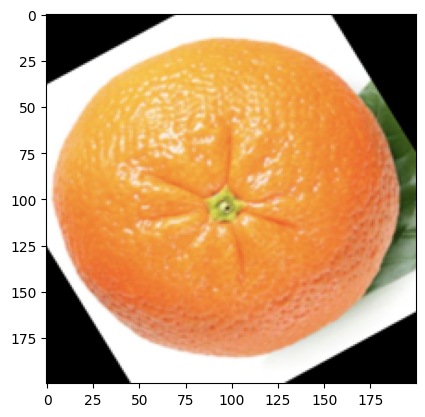

1/1 [==============================] - 0s 33ms/step
Enter expected input : fresh

 ---------------------Image No.  9 --------------------


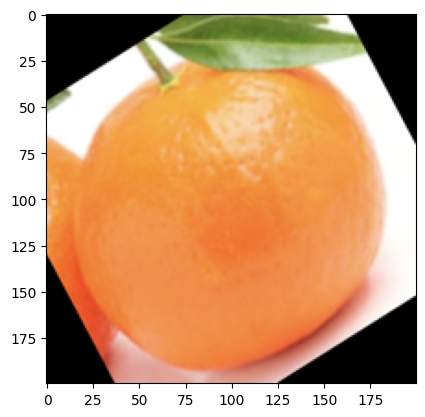

1/1 [==============================] - 0s 39ms/step
Enter expected input : fresh

 ---------------------Image No.  10 --------------------


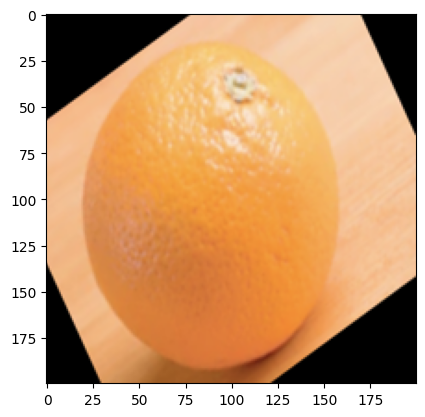

1/1 [==============================] - 0s 29ms/step
Enter expected input : fresh

 ---------------------Image No.  11 --------------------


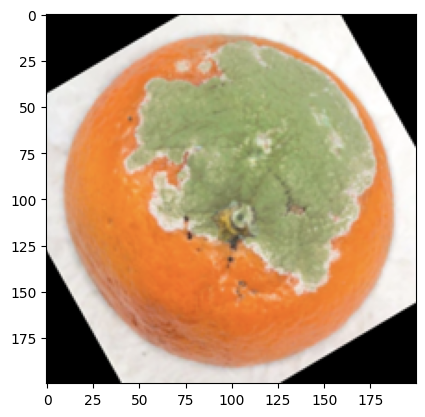

1/1 [==============================] - 0s 58ms/step
Enter expected input : rotten

 ---------------------Image No.  12 --------------------


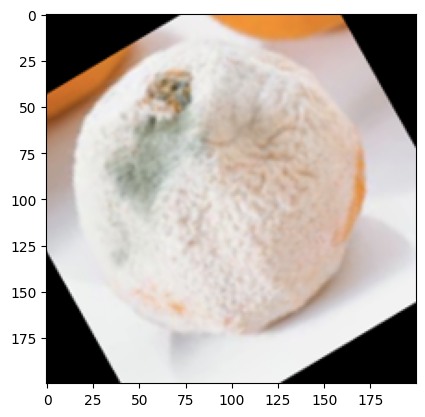

1/1 [==============================] - 0s 33ms/step
Enter expected input : rotten

 ---------------------Image No.  13 --------------------


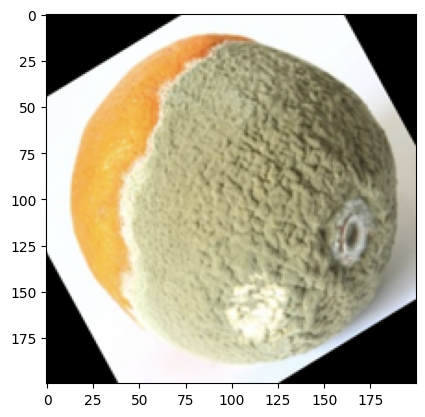

1/1 [==============================] - 0s 52ms/step
Enter expected input : rotten

 ---------------------Image No.  14 --------------------


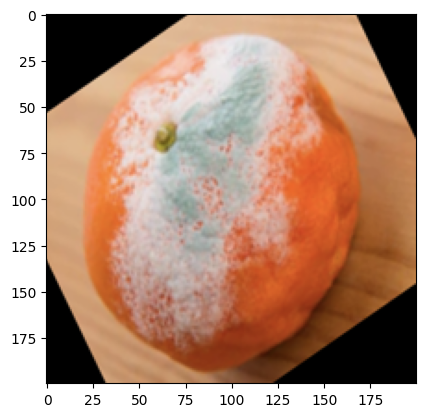

1/1 [==============================] - 0s 39ms/step
Enter expected input : rotten

 ---------------------Image No.  15 --------------------


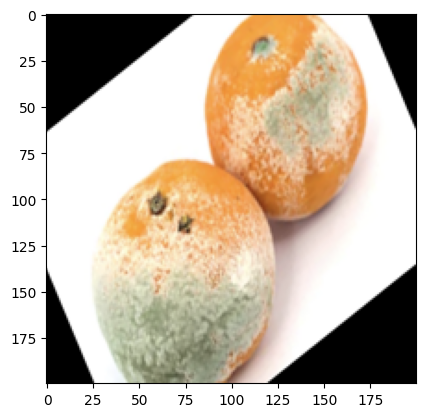

1/1 [==============================] - 0s 41ms/step
Enter expected input : rotten

 ---------------------Image No.  16 --------------------


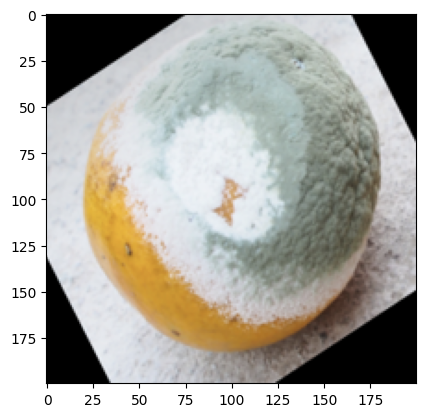

1/1 [==============================] - 0s 37ms/step
Enter expected input : rotten

 ---------------------Image No.  17 --------------------


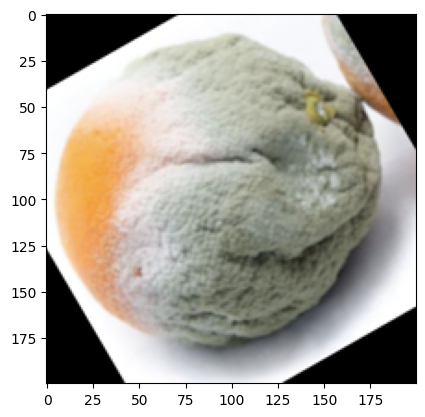

1/1 [==============================] - 0s 42ms/step
Enter expected input : rotten

 ---------------------Image No.  18 --------------------


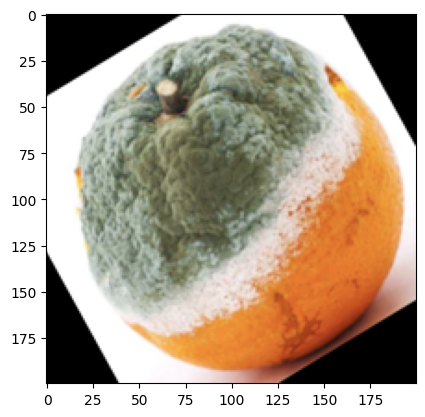

1/1 [==============================] - 0s 36ms/step
Enter expected input : rotten

 ---------------------Image No.  19 --------------------


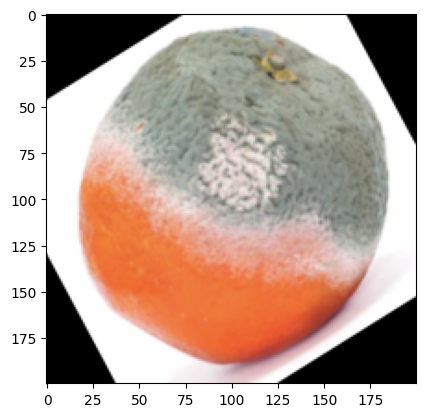

1/1 [==============================] - 0s 48ms/step
Enter expected input : rotten
|   Image | Expected   | Prediction   |
|--------:|:-----------|:-------------|
|       1 | fresh      | Rotten       |
|       2 | fresh      | Rotten       |
|       3 | fresh      | Rotten       |
|       4 | fresh      | Rotten       |
|       5 | fresh      | Fresh        |
|       6 | fresh      | Fresh        |
|       7 | fresh      | Fresh        |
|       8 | fresh      | Rotten       |
|       9 | fresh      | Fresh        |
|      10 | fresh      | Rotten       |
|      11 | rotten     | Rotten       |
|      12 | rotten     | Rotten       |
|      13 | rotten     | Rotten       |
|      14 | rotten     | Rotten       |
|      15 | rotten     | Rotten       |
|      16 | rotten     | Rotten       |
|      17 | rotten     | Rotten       |
|      18 | rotten     | Rotten       |
|      19 | rotten     | Rotten       |
Accuracy : 68.42105263157895


In [ ]:
import os
import numpy as np
from PIL import Image
from tabulate import tabulate

dir_path = '/content/drive/MyDrive/ML_dataset/Oranges/Test'
results = []
count=1
l1=[]
expected=[]
for i in os.listdir(dir_path):
    print("\n ---------------------Image No. ",count,"--------------------")
    img_path = os.path.join(dir_path, i)
    img = Image.open(img_path).resize((200, 200))
    X = np.array(img)
    plt.imshow(img)
    plt.show()

    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = loaded_model.predict(images)[0][0]
    if val == 0:
        l1.append(0)
        prediction = "Fresh"
    else:
        l1.append(1)
        prediction = "Rotten"
    # value=expected[count-1]
    exp=input("Enter expected input : ")
    if(exp=="fresh" or exp=="Fresh"):
      expected.append(0)
    elif (exp=="rotten" or exp=="Rotten"):
      expected.append(1)
    else:
      break

    results.append([count,exp,prediction])
    count=count+1

print(tabulate(results, headers=["Image", "Expected","Prediction"], tablefmt="pipe"))
acc=0
for i in range(len(expected)):
  if expected[i]==l1[i] :
    acc=acc+1

accuracy=float(acc/len(expected))*100
print("Accuracy :",accuracy)

#**Menu Driven**

In [ ]:
from six.moves.urllib.request import urlcleanup
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import load_model

flag=0
print("\n\t ------------------FRUIT QUALITY DETECTION--------------------")
print("\n\t 1. Apples ")
print("\n\t 2. Banana ")
print("\n\t 3. Orange ")
print("\n\t 4. Exit ")
val=int(input("\n\t Enter your choice : "))
if val==1:

  print("\n\t ------------- Upload photo-----------------\n ")
  from google.colab import files

  # Prompt the user to select an image file
  uploaded = files.upload()

  # Get the file name and contents
  url= next(iter(uploaded))
  file_content = uploaded[url]

  # Write the file contents to disk
  with open(url, 'wb') as f:
      f.write(file_content)

  loaded_model = load_model('/content/drive/MyDrive/models/apple.h5')
  img = load_img(url, target_size=(200,200))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  # Make a prediction
  preds = loaded_model.predict(img)
  predicted_class = np.argmax(preds)

  print("\n\t The selected Fruit is Apple ")
  x=input("Enter expected output ")
  if predicted_class==0:
    flag=1
    # print("Fresh")
  else:
    flag=0
    # print("Rotten")
  if(flag==1):
   print("The selected Fruit is Apple ")
   print("Excpected output: ",x)
   print("Model output : Fresh")
  else:
    print("The selected Fruit is Apple ")
    print("Excpected output: ",x)
    print("Model output : Fresh")

elif val==2:
  print("\n\t ------------- Upload photo-----------------\n ")
  from google.colab import files

  # Prompt the user to select an image file
  uploaded = files.upload()

  # Get the file name and contents
  url= next(iter(uploaded))
  file_content = uploaded[url]

  # Write the file contents to disk
  with open(url, 'wb') as f:
      f.write(file_content)

  loaded_model = load_model('/content/drive/MyDrive/models/banana.h5')
  img = load_img(url, target_size=(200,200))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  # Make a prediction
  preds = loaded_model.predict(img)
  predicted_class = np.argmax(preds)

  x=input("Enter expected output ")
  if predicted_class==0:
    flag=1
    # print("Fresh")
  else:
    flag=0
    # print("Rotten")

  if(flag==1):
   print("The selected Fruit is Banana ")
   print("Excpected output: ",x)
   print("Model output : Fresh")
  else:
    print("The selected Fruit is Banana ")
    print("Excpected output: ",x)
    print("Model output : Fresh")

elif val==3:
  print("\n\t ------------- Upload photo-----------------\n ")
  from google.colab import files

  # Prompt the user to select an image file
  uploaded = files.upload()

  # Get the file name and contents
  url= next(iter(uploaded))
  file_content = uploaded[url]

  # Write the file contents to disk
  with open(url, 'wb') as f:
      f.write(file_content)

  loaded_model = load_model('/content/drive/MyDrive/models/orange.h5')
  img = load_img(url, target_size=(200,200))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)

  # Make a prediction
  preds = loaded_model.predict(img)
  predicted_class = np.argmax(preds)
  x=input("Enter expected output ")
  if predicted_class==0:
    flag=1
    # print("Fresh")
  else:
    flag=0
    # print("Rotten")

  if(flag==1):
    print("The selected Fruit is Orange ")
    print("Excpected output: ",x)
    print("Model output : Fresh")
  else:
    print("The selected Fruit is Orange ")
    print("Excpected output: ",x)
    print("Model output : Fresh")





#**Fruit Detection**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Load the data
train_dir = '/content/drive/MyDrive/fruit/train' # change to your own directory path
test_dir = '/content/drive/MyDrive/fruit/test' # change to your own directory path

# Set up the data generators
batch_size = 32
img_height = 224
img_width = 224

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Define the model architecture
# feactures extraction,operating sequential model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),

    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
    # sigmoid for binary classification
    # multiple-softmax
])

# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,epochs=10, validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

test_generator.class_indices


In [ ]:
model.save('main1.h5')

Saving rotated_by_15_Screen Shot 2018-06-12 at 9.38.04 PM.png to rotated_by_15_Screen Shot 2018-06-12 at 9.38.04 PM.png


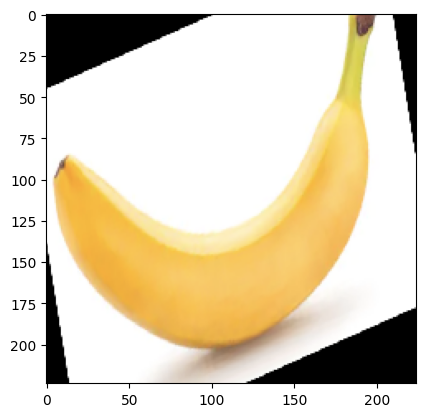

1/1 [==============================] - 0s 108ms/step
none of them


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
#from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/drive/MyDrive/models/main.h5')

from google.colab import files

  # Prompt the user to select an image file
uploaded = files.upload()

  # Get the file name and contents
url= next(iter(uploaded))
file_content = uploaded[url]

  # Write the file contents to disk
with open(url, 'wb') as f:
      f.write(file_content)

# Load the image and preprocess it
img = load_img(url, target_size=(224,224))
plt.imshow(img)
plt.show()
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# Make a prediction
preds = loaded_model.predict(img)
predicted_class = np.argmax(preds)
val=0

# Interpret the result
if predicted_class == 0:
    print("APPLE")
    val=0
elif predicted_class == 2:
    print("ORANGE")
    val=2
elif predicted_class == 3:
    print("BANANA")
else :
  print("none of them")